In [1]:
import sys
sys.path.insert(0, '../tree/')
from coverage import Coverage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time

In [2]:
node_list = [[[13, 2, 2], 8, [4, 4], [2, 22]], 
             [2, 13], [[2, 2, 2, 2, 2], 10], [[2, 2, 4], [2, 6]], 
             [4, 4, [8, 2]]]
alpha_true = [0.4, -0.3, 0.3]
base_rate_true = 0.1
n_cov = 3

In [3]:
data = pd.read_csv('../data/test/sim_data_tiny_1568922732.csv')

In [4]:
file_path = '../data/test/20190919_1568922732_coverage/'
hold_out = ['1_5', '1_4_2']
hold_out_leaves = [('1_1_1_1', .4), ('1_2_2', .4)]
cvr = Coverage(data, node_list, n_cov, file_path, hold_out, hold_out_leaves)

In [5]:
n_runs = 10
n_draws = 100

#### Bottom fit

../data/test/20190919_1568922732_coverage/bottom/ns_node_1.db init
../data/test/20190919_1568922732_coverage/bottom/ns_node_1.db fit fixed
../data/test/20190919_1568922732_coverage/bottom/ns_node_1.db set start_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1.db fit both
holdout  1_5
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_4.db init
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_4.db fit fixed
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_4.db set start_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_4.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_4.db fit both
holdout  1_4_2
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_2.db init
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_2.db fit fixed
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_

../data/test/20190919_1568922732_coverage/bottom/ns_node_1_4.db fit both
holdout  1_4_2
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_2.db init
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_2.db fit fixed
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_2.db set start_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_2.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_1.db init
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_1.db fit fixed
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_1.db set start_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_1.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_1.db fit both
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_3.db init
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_3.db fit fixed
../data/test/20190919_1568922732_coverage/bo

../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_1.db set start_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_1.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_1.db fit both
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_3.db init
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_3.db fit fixed
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_3.db set start_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_3.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_3.db fit both
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_4.db init
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_4.db fit fixed
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_4.db set start_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_4.db set scale_var fit_var
../data/test/20190919_156892

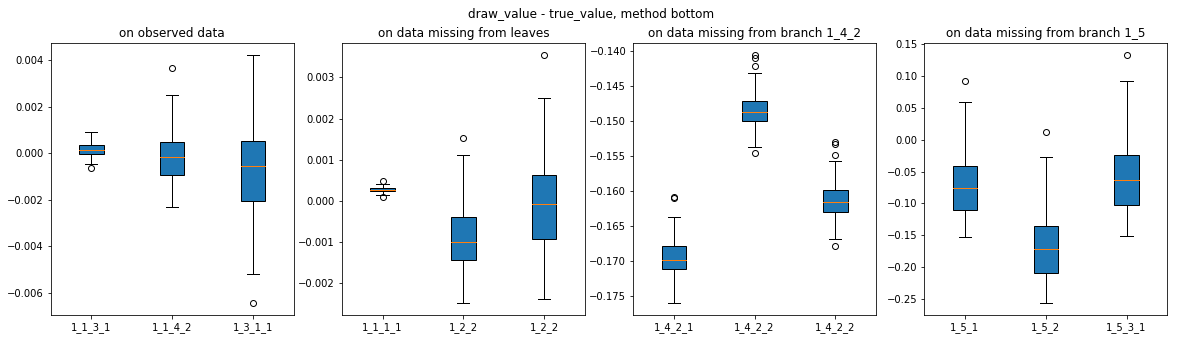

In [6]:
iota_dist, alpha_dist, u_dist,_ = cvr.get_y_coverage('bottom', n_draws=100, save_draws=True,
                                         n_run=2, n_sim=10, plot=True)

In [7]:
cvr.data.head()

,Unnamed: 0,cov1,cov2,cov3,hold_out,leaf,level_0,level_0_u,level_1,level_1_u,...,n_data_in_leaf,node,true_val,hold_out_branch,bottom_0_avgint,bottom_0_res,bottom_1_avgint,bottom_1_res,bottom_2_avgint,bottom_2_res
0,0,0.158863,0.235319,0.412593,True,1_1_1_1,1,-0.819048,1_1,-0.278462,...,13,1_1_1_1,0.021789,1_1_1_1,0.021789,0.001286,0.021826,0.21286,0.022082,-0.882010
1,1,0.362580,0.232722,0.224204,True,1_1_1_1,1,-0.819048,1_1,-0.278462,...,13,1_1_1_1,0.022358,1_1_1_1,0.022358,-0.000475,0.022482,-0.12836,0.022754,0.045078
2,2,0.202682,0.189160,0.251344,True,1_1_1_1,1,-0.819048,1_1,-0.278462,...,13,1_1_1_1,0.021422,1_1_1_1,0.021422,0.000235,0.021488,0.50106,0.021718,0.581080
3,3,0.078406,-0.117362,-0.042118,True,1_1_1_1,1,-0.819048,1_1,-0.278462,...,13,1_1_1_1,0.020463,1_1_1_1,0.020463,-0.001195,0.020520,-0.42242,0.020635,-2.876700
4,4,-0.270412,0.134604,0.170277,True,1_1_1_1,1,-0.819048,1_1,-0.278462,...,13,1_1_1_1,0.017588,1_1_1_1,0.017588,0.001640,0.017525,0.39484,0.017634,0.005305


#### Top-bottom fit

../data/test/20190919_1568922732_coverage/top-bottom/node_1.db init
../data/test/20190919_1568922732_coverage/top-bottom/node_1.db fit both
holdout  1_5
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_4.db init
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_4.db fit both
holdout  1_4_2
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_1_2.db init
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_1_2.db fit fixed
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_1_2.db set start_var fit_var
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_1_2.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_1_1.db init
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_1_1.db fit both
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_1_3.db init
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_1_3.db fit both
../data/test/20190919_1568922732_co

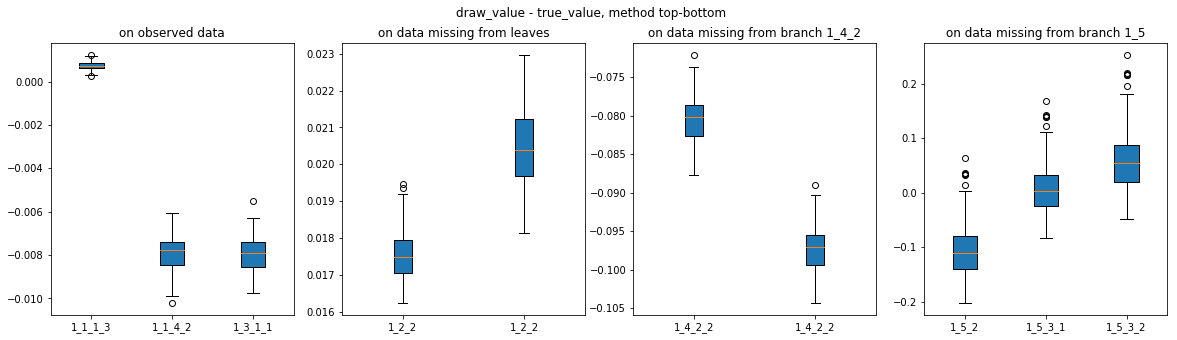

In [8]:
iota_dist2, alpha_dist2, u_dist2,_ = cvr.get_y_coverage('top-bottom', n_draws=100, save_draws=True,
                                         n_run=2, n_sim=10, plot=True)

In [11]:
cvr.data.head()

,Unnamed: 0,cov1,cov2,cov3,hold_out,leaf,level_0,level_0_u,level_1,level_1_u,...,bottom_1_avgint,bottom_1_res,bottom_2_avgint,bottom_2_res,top-bottom_0_avgint,top-bottom_0_res,top-bottom_1_avgint,top-bottom_1_res,top-bottom_2_avgint,top-bottom_2_res
0,0,0.158863,0.235319,0.412593,True,1_1_1_1,1,-0.819048,1_1,-0.278462,...,0.021826,0.21286,0.022082,-0.882010,0.024685,-12.82900,0.025554,-5.38740,0.025390,-2.0505
1,1,0.362580,0.232722,0.224204,True,1_1_1_1,1,-0.819048,1_1,-0.278462,...,0.022482,-0.12836,0.022754,0.045078,0.025108,-10.48500,0.025564,-1.96030,0.025330,-1.9502
2,2,0.202682,0.189160,0.251344,True,1_1_1_1,1,-0.819048,1_1,-0.278462,...,0.021488,0.50106,0.021718,0.581080,0.023495,-7.71500,0.024009,-0.70544,0.023814,-2.5290
3,3,0.078406,-0.117362,-0.042118,True,1_1_1_1,1,-0.819048,1_1,-0.278462,...,0.020520,-0.42242,0.020635,-2.876700,0.019715,1.62060,0.019486,1.13910,0.019260,2.3637
4,4,-0.270412,0.134604,0.170277,True,1_1_1_1,1,-0.819048,1_1,-0.278462,...,0.017525,0.39484,0.017634,0.005305,0.017757,-0.69664,0.018297,-2.13520,0.018205,-3.2144


#### Cascade

../data/test/20190919_1568922732_coverage/cascade/s_node_1.db init
../data/test/20190919_1568922732_coverage/cascade/s_node_1.db fit both
holdout  1_5
../data/test/20190919_1568922732_coverage/cascade/s_node_1.db set truth_var fit_var
../data/test/20190919_1568922732_coverage/cascade/s_node_1.db set start_var fit_var
../data/test/20190919_1568922732_coverage/cascade/s_node_1.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/cascade/s_node_1.db simulate 10
../data/test/20190919_1568922732_coverage/cascade/s_node_1.db sample simulate 10
../data/test/20190919_1568922732_coverage/cascade/s_node_1.db predict sample
../data/test/20190919_1568922732_coverage/cascade/s_node_1_1.db init
../data/test/20190919_1568922732_coverage/cascade/s_node_1_1.db fit both
../data/test/20190919_1568922732_coverage/cascade/s_node_1_1.db set truth_var fit_var
../data/test/20190919_1568922732_coverage/cascade/s_node_1_1.db set start_var fit_var
../data/test/20190919_1568922732_coverage/cascade/s

../data/test/20190919_1568922732_coverage/cascade/s_node_1_1_1.db fit both
../data/test/20190919_1568922732_coverage/cascade/s_node_1_1_3.db init
../data/test/20190919_1568922732_coverage/cascade/s_node_1_1_3.db fit both
../data/test/20190919_1568922732_coverage/cascade/s_node_1_1_4.db init
../data/test/20190919_1568922732_coverage/cascade/s_node_1_1_4.db fit both
../data/test/20190919_1568922732_coverage/cascade/s_node_1_2.db init
../data/test/20190919_1568922732_coverage/cascade/s_node_1_2.db fit both
../data/test/20190919_1568922732_coverage/cascade/s_node_1_3.db init
../data/test/20190919_1568922732_coverage/cascade/s_node_1_3.db fit both
../data/test/20190919_1568922732_coverage/cascade/s_node_1_3.db set truth_var fit_var
../data/test/20190919_1568922732_coverage/cascade/s_node_1_3.db set start_var fit_var
../data/test/20190919_1568922732_coverage/cascade/s_node_1_3.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/cascade/s_node_1_3.db simulate 10
../data/test/20

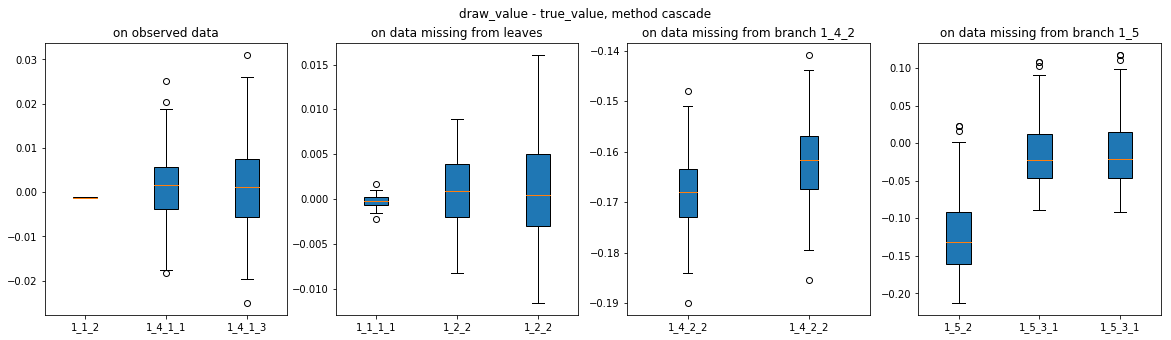

In [6]:
iota_dist3, alpha_dist3, u_dist3,_ = cvr.get_y_coverage('cascade', n_draws=100, save_draws=True,
                                         n_run=2, n_sim=10, plot=True)

In [7]:
cvr.data.head()

,Unnamed: 0,cov1,cov2,cov3,hold_out,leaf,level_0,level_0_u,level_1,level_1_u,...,n_data_in_leaf,node,true_val,hold_out_branch,cascade_0_avgint,cascade_0_res,cascade_1_avgint,cascade_1_res,cascade_2_avgint,cascade_2_res
0,0,0.158863,0.235319,0.412593,True,1_1_1_1,1,-0.819048,1_1,-0.278462,...,13,1_1_1_1,0.021789,1_1_1_1,0.022069,-1.28610,0.021655,3.6195,0.022533,-1.41280
1,1,0.362580,0.232722,0.224204,True,1_1_1_1,1,-0.819048,1_1,-0.278462,...,13,1_1_1_1,0.022358,1_1_1_1,0.022764,-1.81900,0.022149,2.4209,0.023573,-4.99770
2,2,0.202682,0.189160,0.251344,True,1_1_1_1,1,-0.819048,1_1,-0.278462,...,13,1_1_1_1,0.021422,1_1_1_1,0.021663,-1.12690,0.021288,2.1762,0.022096,-0.47587
3,3,0.078406,-0.117362,-0.042118,True,1_1_1_1,1,-0.819048,1_1,-0.278462,...,13,1_1_1_1,0.020463,1_1_1_1,0.020380,0.40818,0.020457,-1.4022,0.020218,-0.10786
4,4,-0.270412,0.134604,0.170277,True,1_1_1_1,1,-0.819048,1_1,-0.278462,...,13,1_1_1_1,0.017588,1_1_1_1,0.017413,0.99337,0.017624,-1.9906,0.016973,1.45680


#### compare methods

../data/test/20190919_1568922732_coverage/bottom/ns_node_1.db init
../data/test/20190919_1568922732_coverage/bottom/ns_node_1.db fit fixed
../data/test/20190919_1568922732_coverage/bottom/ns_node_1.db set start_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1.db fit both
holdout  1_5
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_4.db init
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_4.db fit fixed
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_4.db set start_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_4.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_4.db fit both
holdout  1_4_2
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_2.db init
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_2.db fit fixed
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_

../data/test/20190919_1568922732_coverage/bottom/ns_node_1_4.db fit both
holdout  1_4_2
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_2.db init
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_2.db fit fixed
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_2.db set start_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_2.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_1.db init
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_1.db fit fixed
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_1.db set start_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_1.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_1.db fit both
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_3.db init
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_3.db fit fixed
../data/test/20190919_1568922732_coverage/bo

../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_1.db set start_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_1.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_1.db fit both
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_3.db init
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_3.db fit fixed
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_3.db set start_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_3.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_3.db fit both
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_4.db init
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_4.db fit fixed
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_4.db set start_var fit_var
../data/test/20190919_1568922732_coverage/bottom/ns_node_1_1_4.db set scale_var fit_var
../data/test/20190919_156892

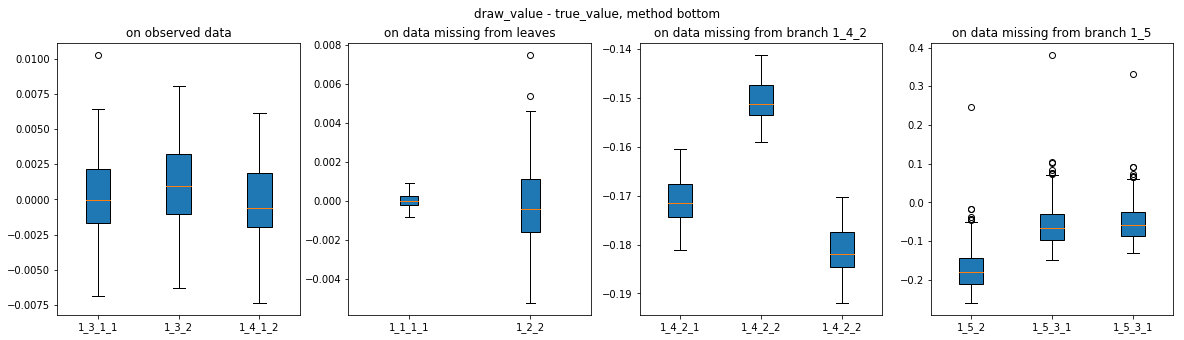

../data/test/20190919_1568922732_coverage/top-bottom/node_1.db init
../data/test/20190919_1568922732_coverage/top-bottom/node_1.db fit both
holdout  1_5
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_4.db init
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_4.db fit both
holdout  1_4_2
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_1_2.db init
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_1_2.db fit fixed
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_1_2.db set start_var fit_var
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_1_2.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_1_1.db init
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_1_1.db fit both
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_1_3.db init
../data/test/20190919_1568922732_coverage/top-bottom/ns_node_1_1_3.db fit both
../data/test/20190919_1568922732_co

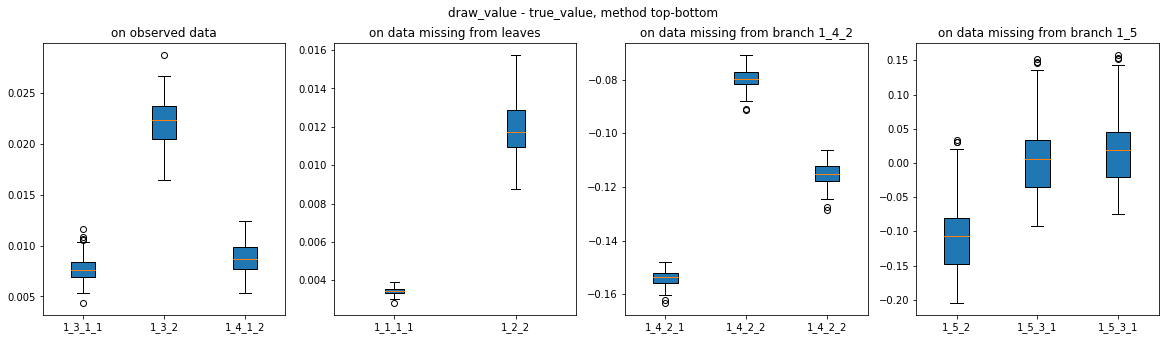

../data/test/20190919_1568922732_coverage/cascade/s_node_1.db init
../data/test/20190919_1568922732_coverage/cascade/s_node_1.db fit both
holdout  1_5
../data/test/20190919_1568922732_coverage/cascade/s_node_1.db set truth_var fit_var
../data/test/20190919_1568922732_coverage/cascade/s_node_1.db set start_var fit_var
../data/test/20190919_1568922732_coverage/cascade/s_node_1.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/cascade/s_node_1.db simulate 10
../data/test/20190919_1568922732_coverage/cascade/s_node_1.db sample simulate 10
../data/test/20190919_1568922732_coverage/cascade/s_node_1.db predict sample
../data/test/20190919_1568922732_coverage/cascade/s_node_1_1.db init
../data/test/20190919_1568922732_coverage/cascade/s_node_1_1.db fit both
../data/test/20190919_1568922732_coverage/cascade/s_node_1_1.db set truth_var fit_var
../data/test/20190919_1568922732_coverage/cascade/s_node_1_1.db set start_var fit_var
../data/test/20190919_1568922732_coverage/cascade/s

../data/test/20190919_1568922732_coverage/cascade/s_node_1_1_1.db fit both
../data/test/20190919_1568922732_coverage/cascade/s_node_1_1_3.db init
../data/test/20190919_1568922732_coverage/cascade/s_node_1_1_3.db fit both
../data/test/20190919_1568922732_coverage/cascade/s_node_1_1_4.db init
../data/test/20190919_1568922732_coverage/cascade/s_node_1_1_4.db fit both
../data/test/20190919_1568922732_coverage/cascade/s_node_1_2.db init
../data/test/20190919_1568922732_coverage/cascade/s_node_1_2.db fit both
../data/test/20190919_1568922732_coverage/cascade/s_node_1_3.db init
../data/test/20190919_1568922732_coverage/cascade/s_node_1_3.db fit both
../data/test/20190919_1568922732_coverage/cascade/s_node_1_3.db set truth_var fit_var
../data/test/20190919_1568922732_coverage/cascade/s_node_1_3.db set start_var fit_var
../data/test/20190919_1568922732_coverage/cascade/s_node_1_3.db set scale_var fit_var
../data/test/20190919_1568922732_coverage/cascade/s_node_1_3.db simulate 10
../data/test/20

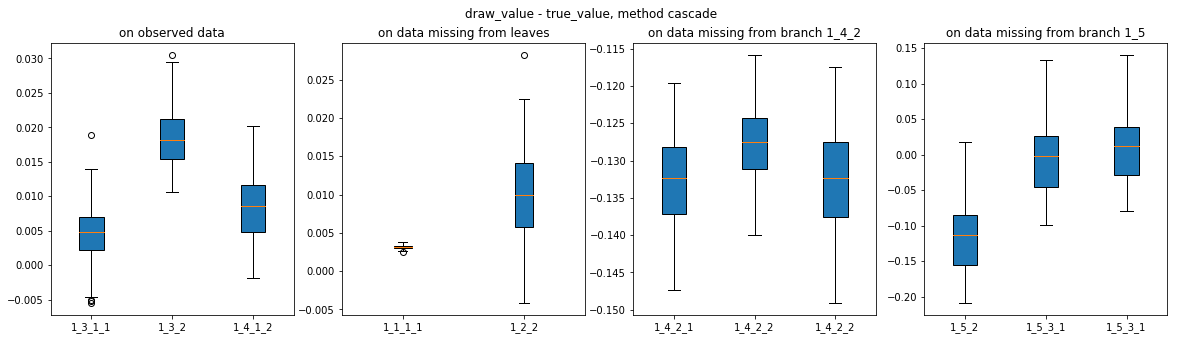

In [6]:
iota_dist_all, alpha_dist_all, u_dist_all = cvr.compare_methods(n_draws=100, n_runs=2)